In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
from Functions import *

In [22]:
df = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


### Chuyển ngày thành năm

In [23]:
df['DAYS_CREDIT_ENDDATE'][df['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
df['DAYS_ENDDATE_FACT'][df['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
df['DAYS_CREDIT_UPDATE'][df['DAYS_CREDIT_UPDATE'] > -50*365] = np.nan

# Pre check overall Dataframe

In [24]:
df_check = pre_check_tool(df)
df_check.split_data()

In [25]:
# Check null percent
df_check.check_per_null()

,number_missing,percent_missing
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,1465191,99.990855
DAYS_ENDDATE_FACT,1465324,99.999932
AMT_CREDIT_MAX_OVERDUE,948545,64.732738
CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,3,0.000205


In [26]:
# find cols that have null > 90%
print(df_check.find_null_cols(0.9))

Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE'], dtype='object')


3 cột có %null>90 --> Có thể drop

In [27]:
#duplicate check
df.duplicated().sum()

0

In [28]:
# valid value
## Num data
df_check.check_value_num()
print('\n\n\n')

## cat data
df_check.check_value_cat()

SK_ID_BUREAU  has     >0 1465325,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_CREDIT  has     >0 0,  =0 4  ,   <0 1465321,    nan: 0,   other values: 0
CREDIT_DAY_OVERDUE  has     >0 3706,  =0 1461619  ,   <0 0,    nan: 0,   other values: 0
DAYS_CREDIT_ENDDATE  has     >0 0,  =0 0  ,   <0 134,    nan: 1465191,   other values: 0
AMT_CREDIT_MAX_OVERDUE  has     >0 107137,  =0 409643  ,   <0 0,    nan: 948545,   other values: 0
CNT_CREDIT_PROLONG  has     >0 8820,  =0 1456505  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT_SUM  has     >0 1409394,  =0 55928  ,   <0 0,    nan: 3,   other values: 0
AMT_CREDIT_SUM_DEBT  has     >0 369163,  =0 864650  ,   <0 8418,    nan: 223094,   other values: 0
AMT_CREDIT_SUM_LIMIT  has     >0 64880,  =0 910424  ,   <0 351,    nan: 489670,   other values: 0
AMT_CREDIT_SUM_OVERDUE  has     >0 3644,  =0 1461681  ,   <0 0,    nan: 0,   other values: 0
DAYS_CREDIT_UPDATE  has     >0 0,  =0 0  ,   <0 95,    nan: 1465230,   other values: 0
AMT_ANNUITY 

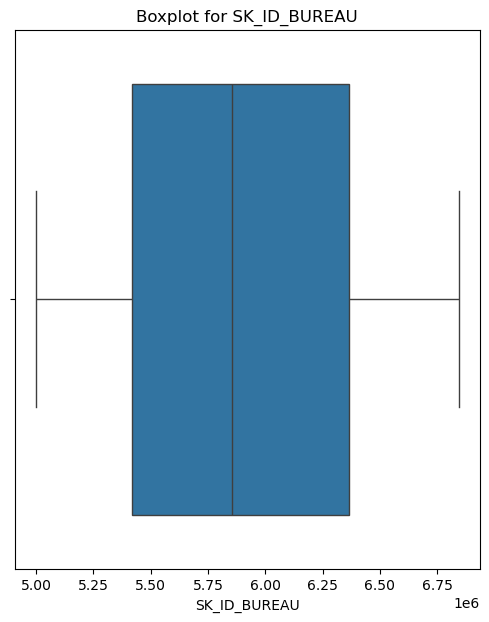

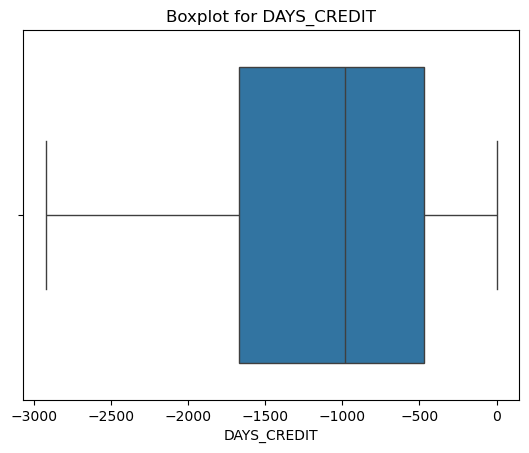

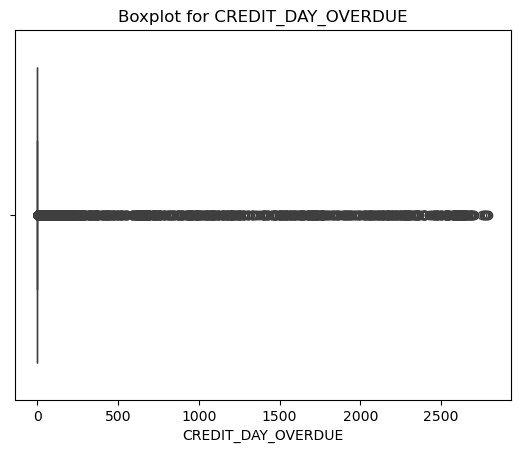

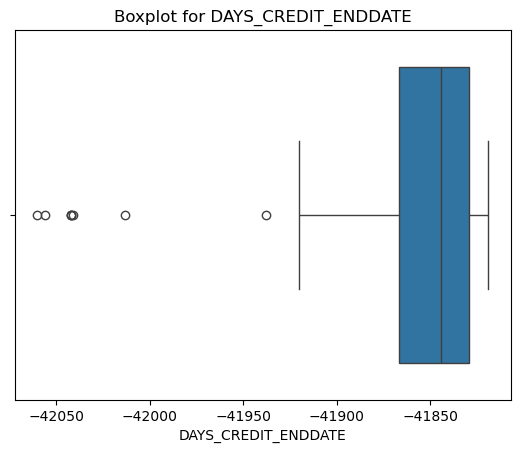

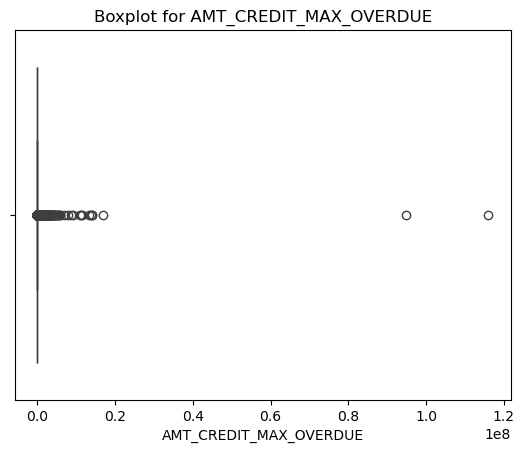

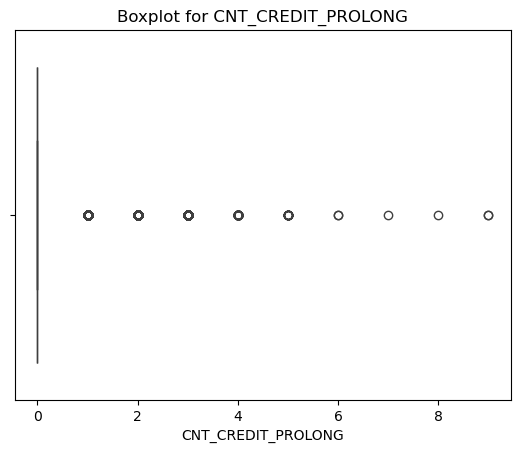

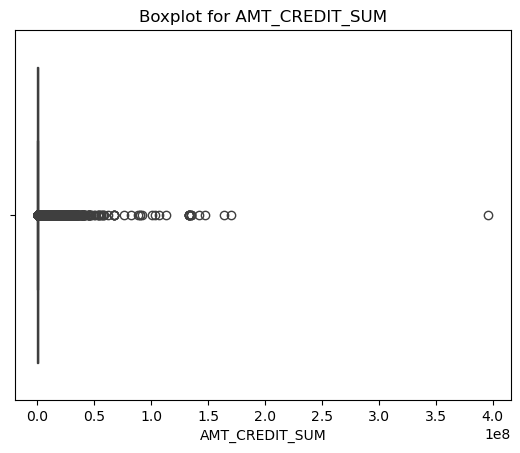

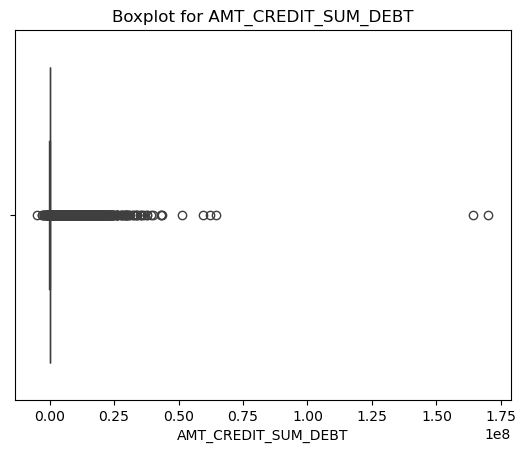

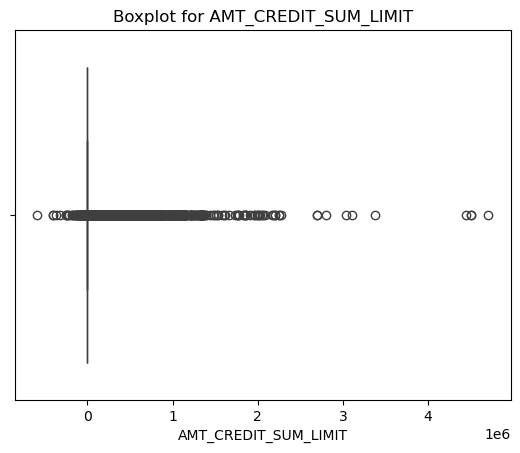

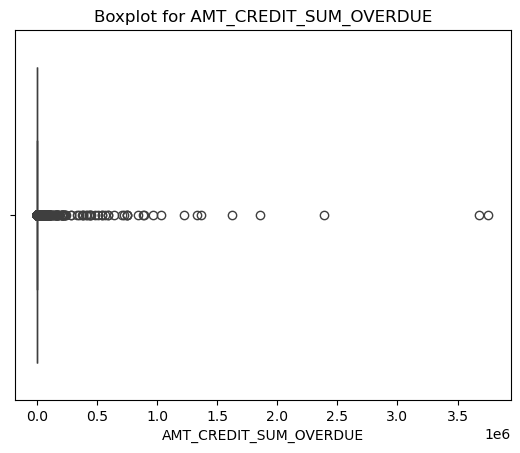

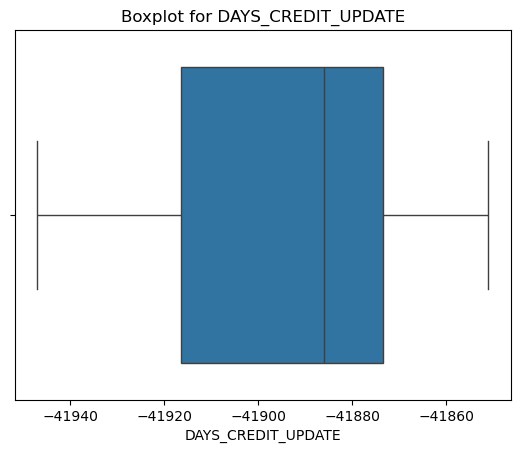

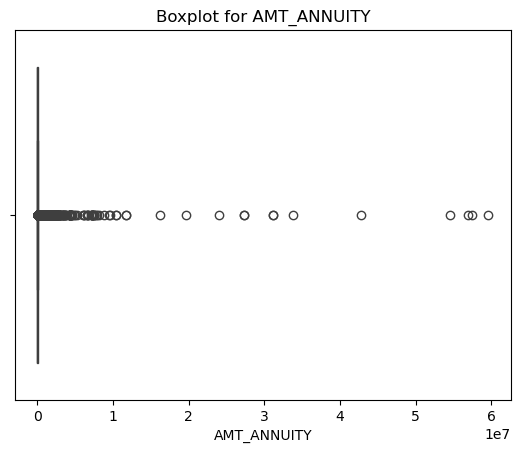

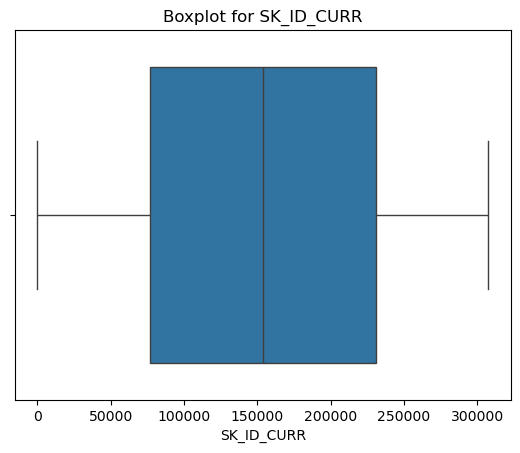

In [29]:
# Outliers 
df_check.show_outliers()

TypeError: 'Axes' object is not subscriptable

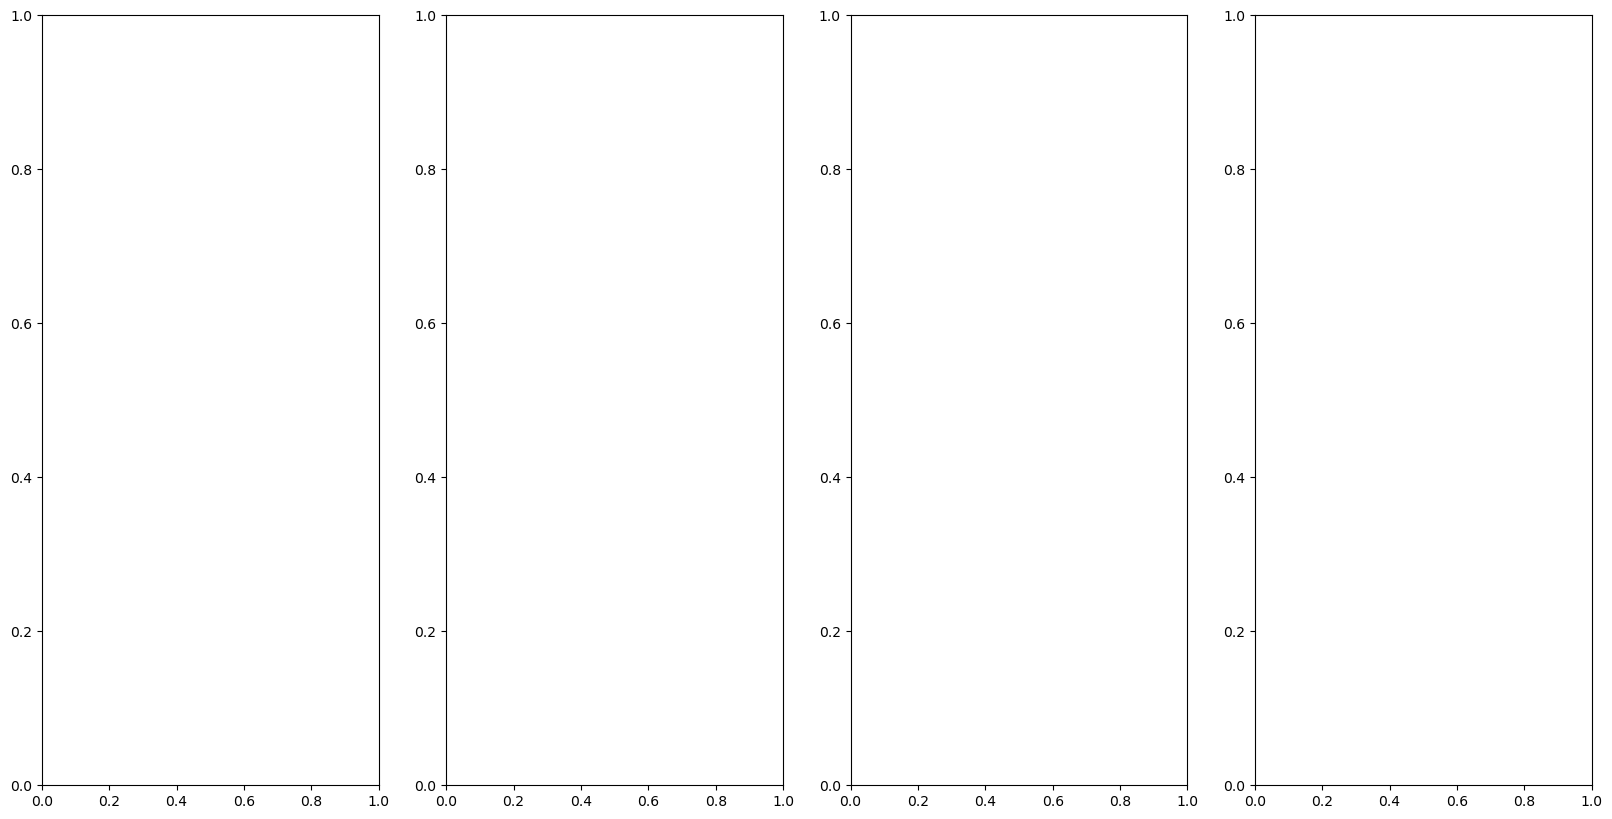

In [30]:
df_check.dist_catchart()

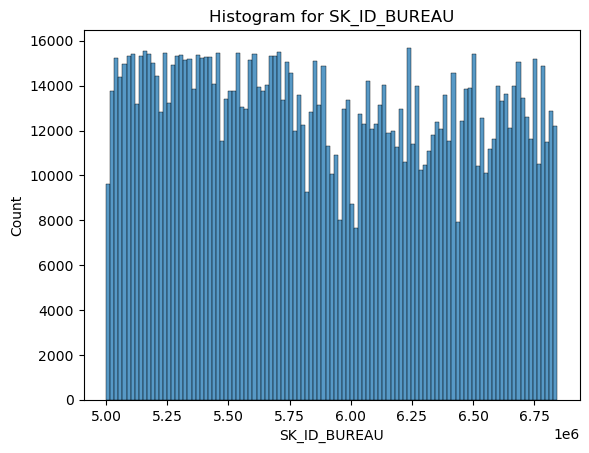

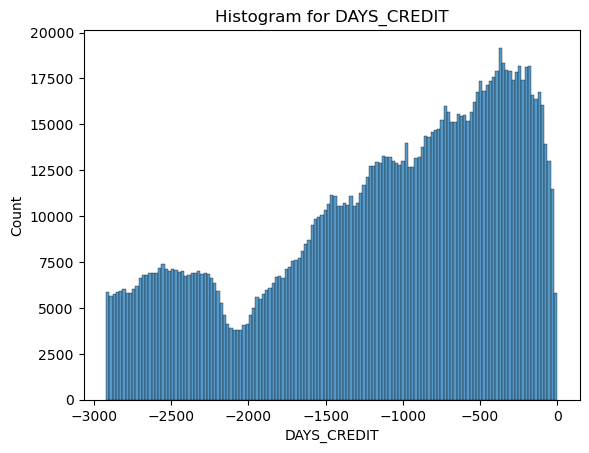

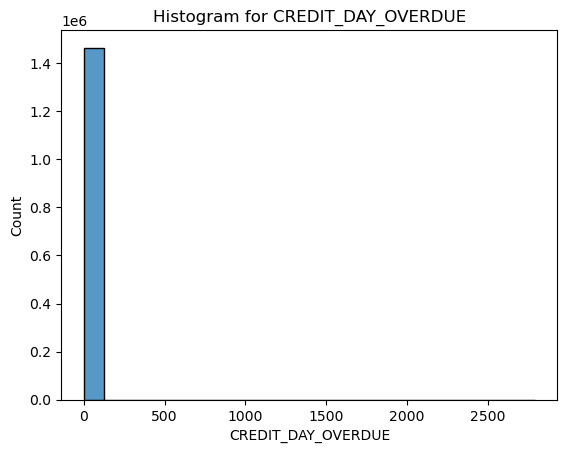

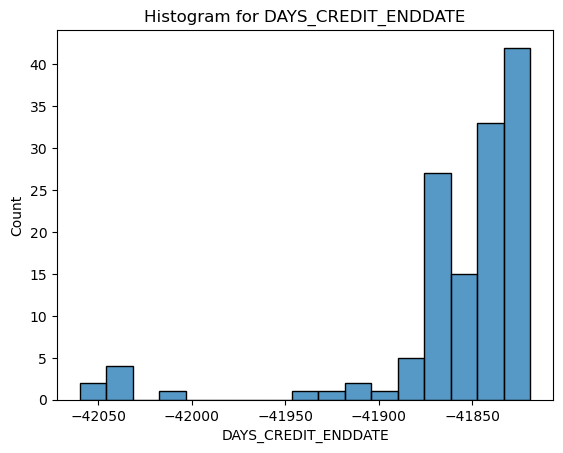

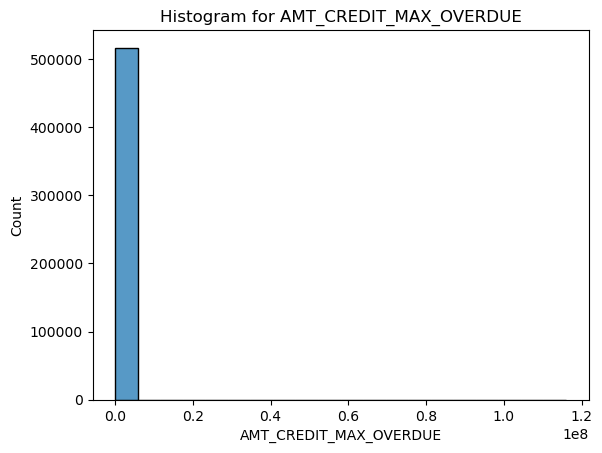

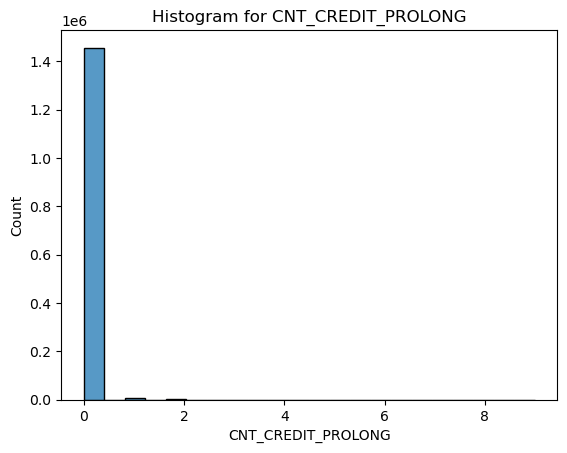

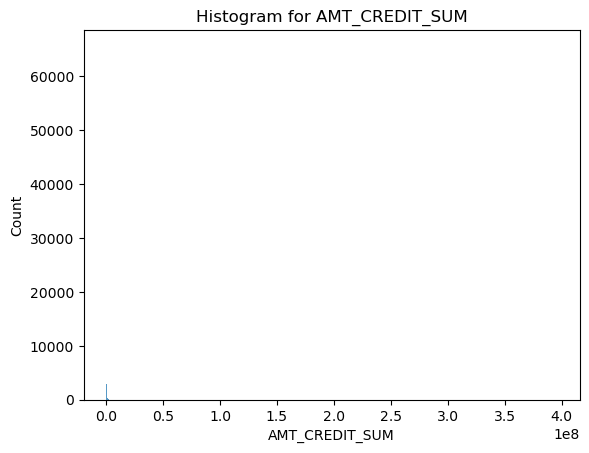

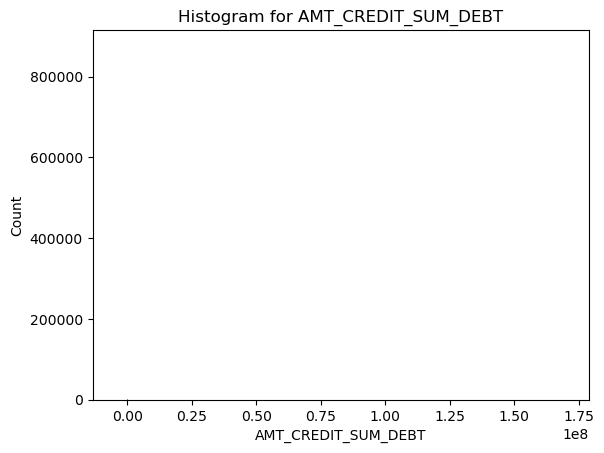

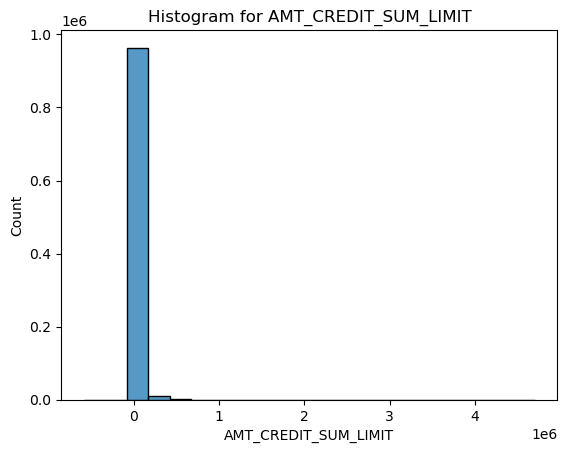

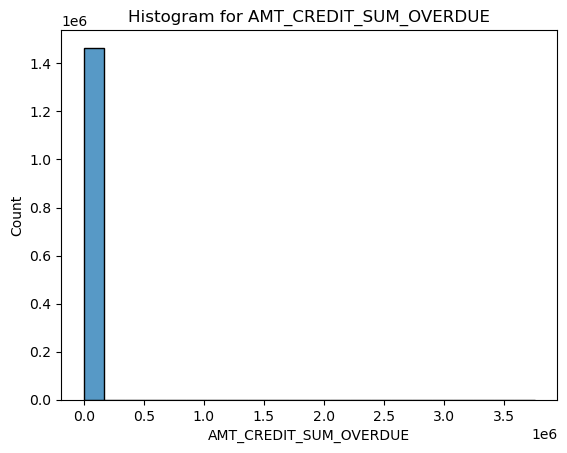

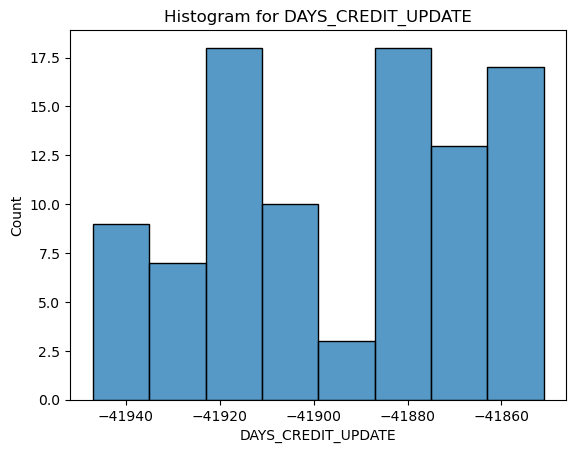

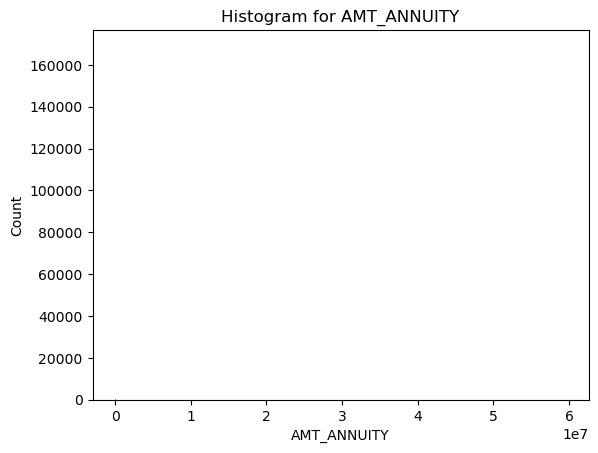

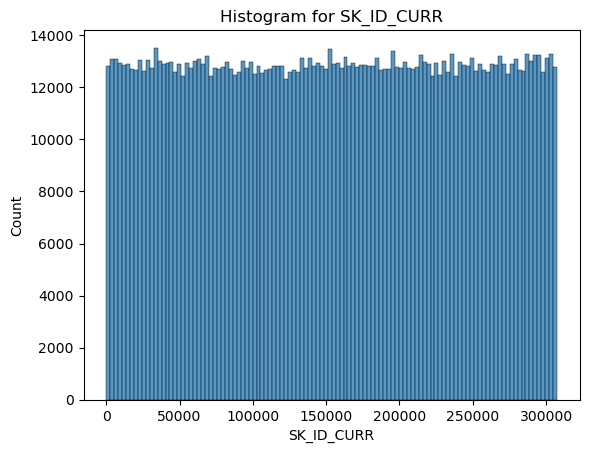

In [31]:
df_check.dist_numchart()

# EDA Internal

## Univariate Analysis

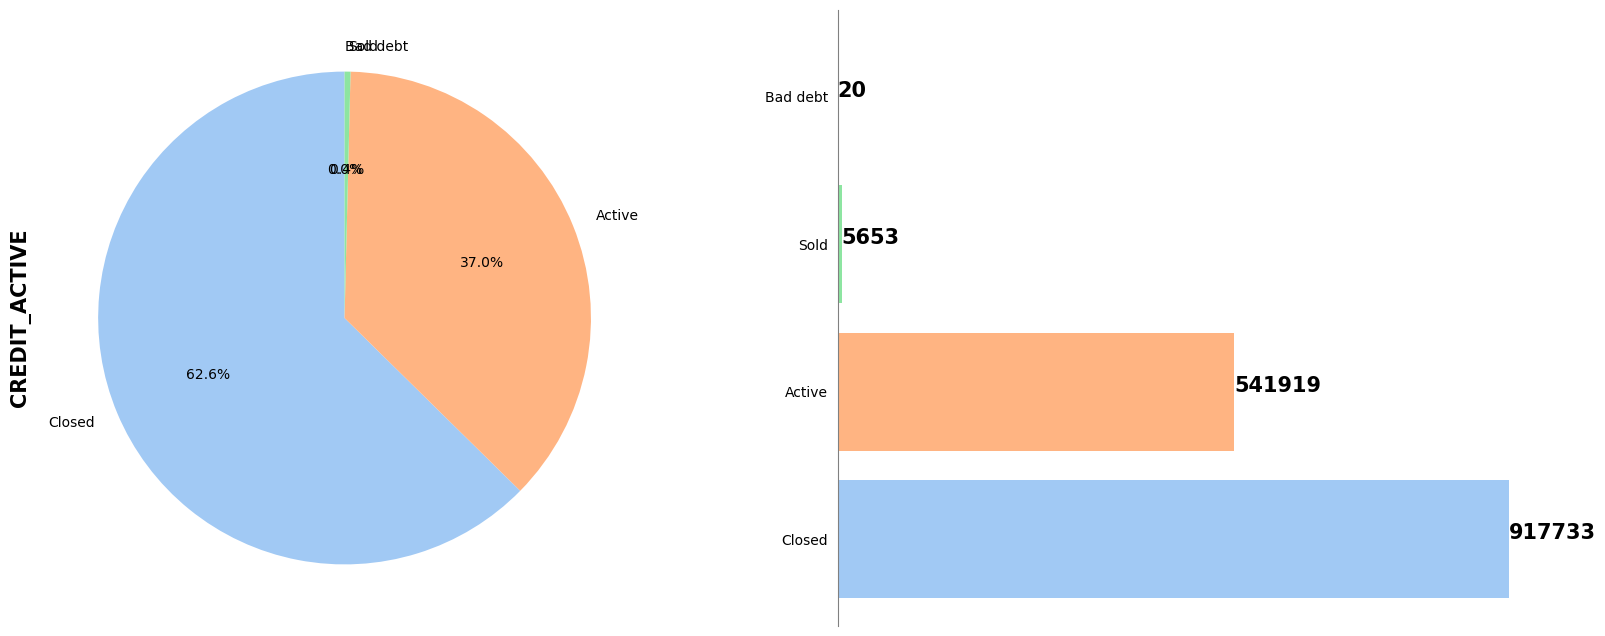

In [33]:
obj1 = Univariate_Analysis(df= df, col= 'CREDIT_ACTIVE', num= False)
obj1.visualize()

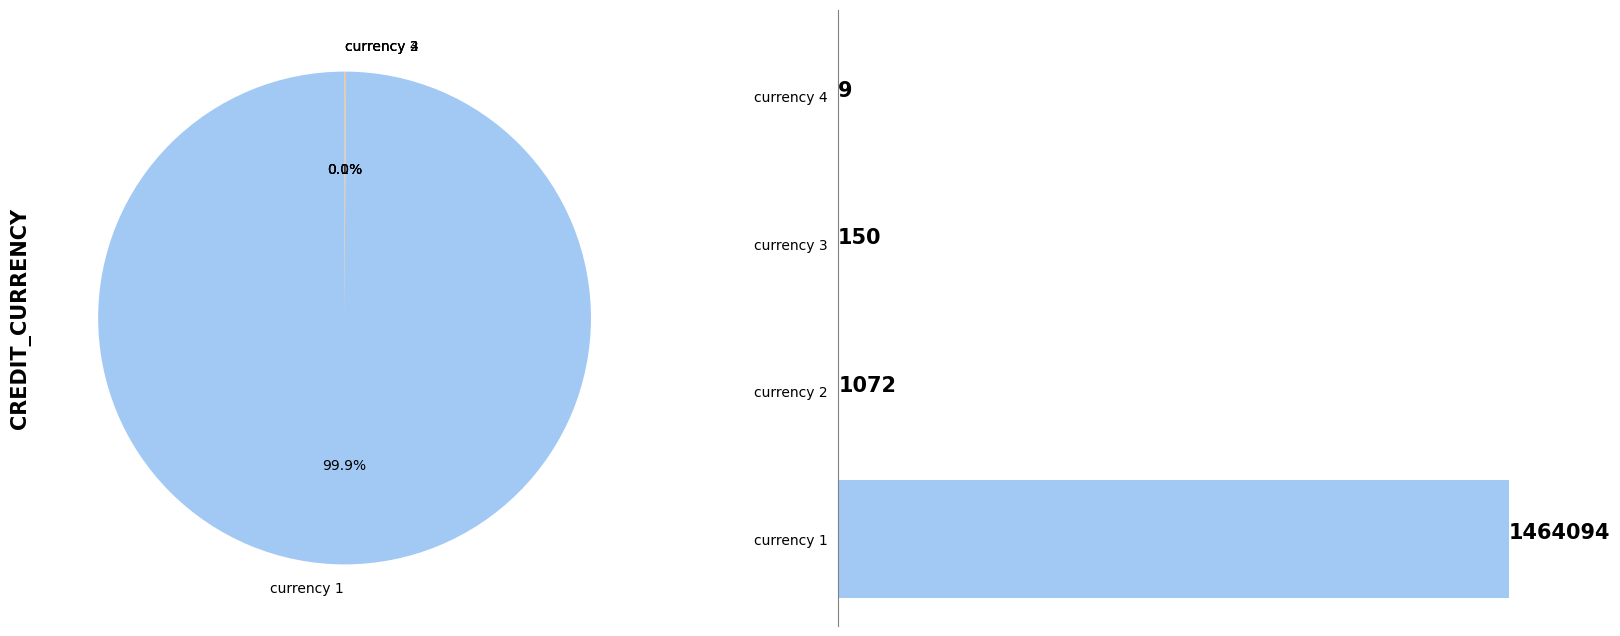

In [34]:
obj2 = Univariate_Analysis(df= df, col= 'CREDIT_CURRENCY', num= False)
obj2.visualize()

+ The majority of currency is currency 1 with 99.9%

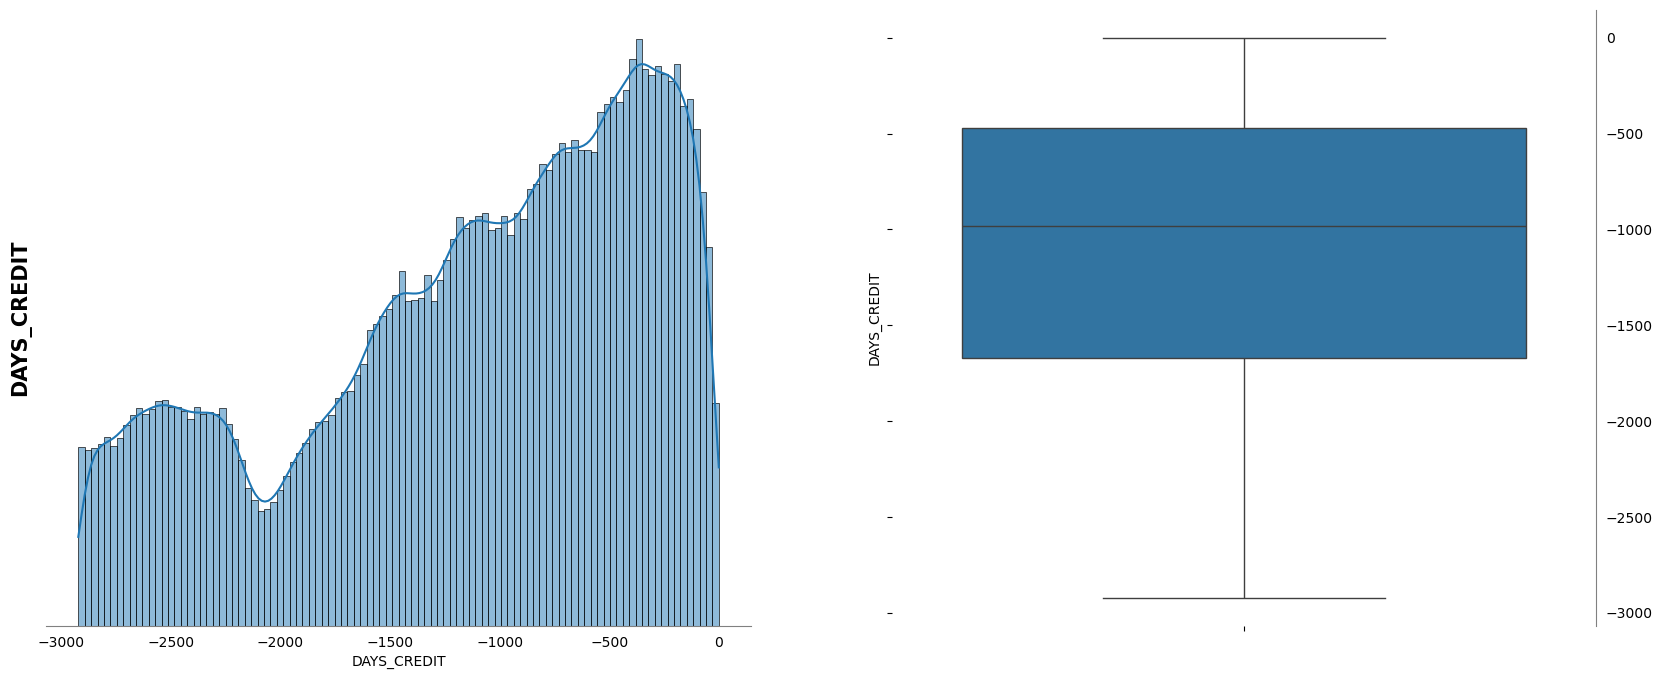

In [36]:
obj3 = Univariate_Analysis(df= df, col= 'DAYS_CREDIT', num= True)
obj3.visualize()

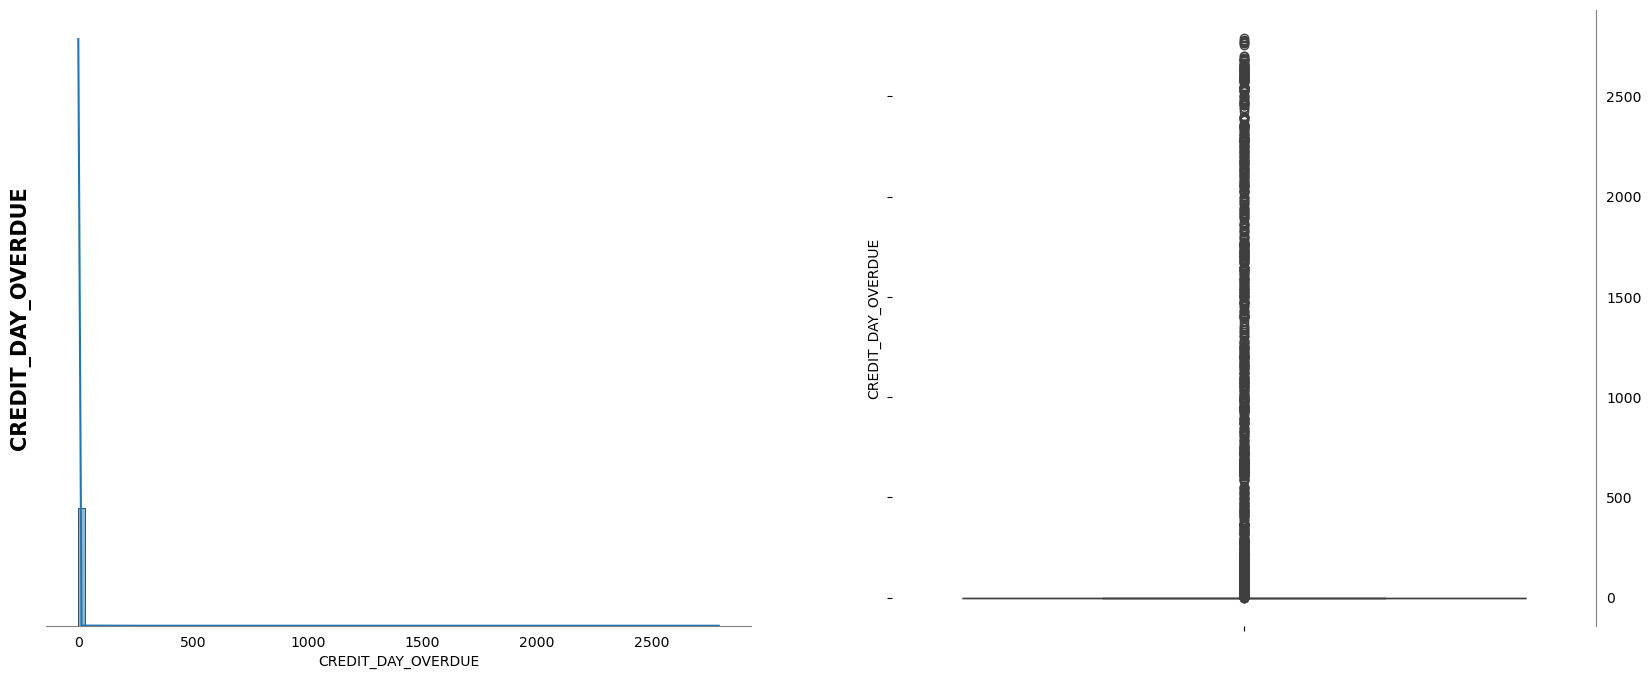

In [38]:
obj4 = Univariate_Analysis(df= df, col= 'CREDIT_DAY_OVERDUE', num= True)
obj4.visualize()

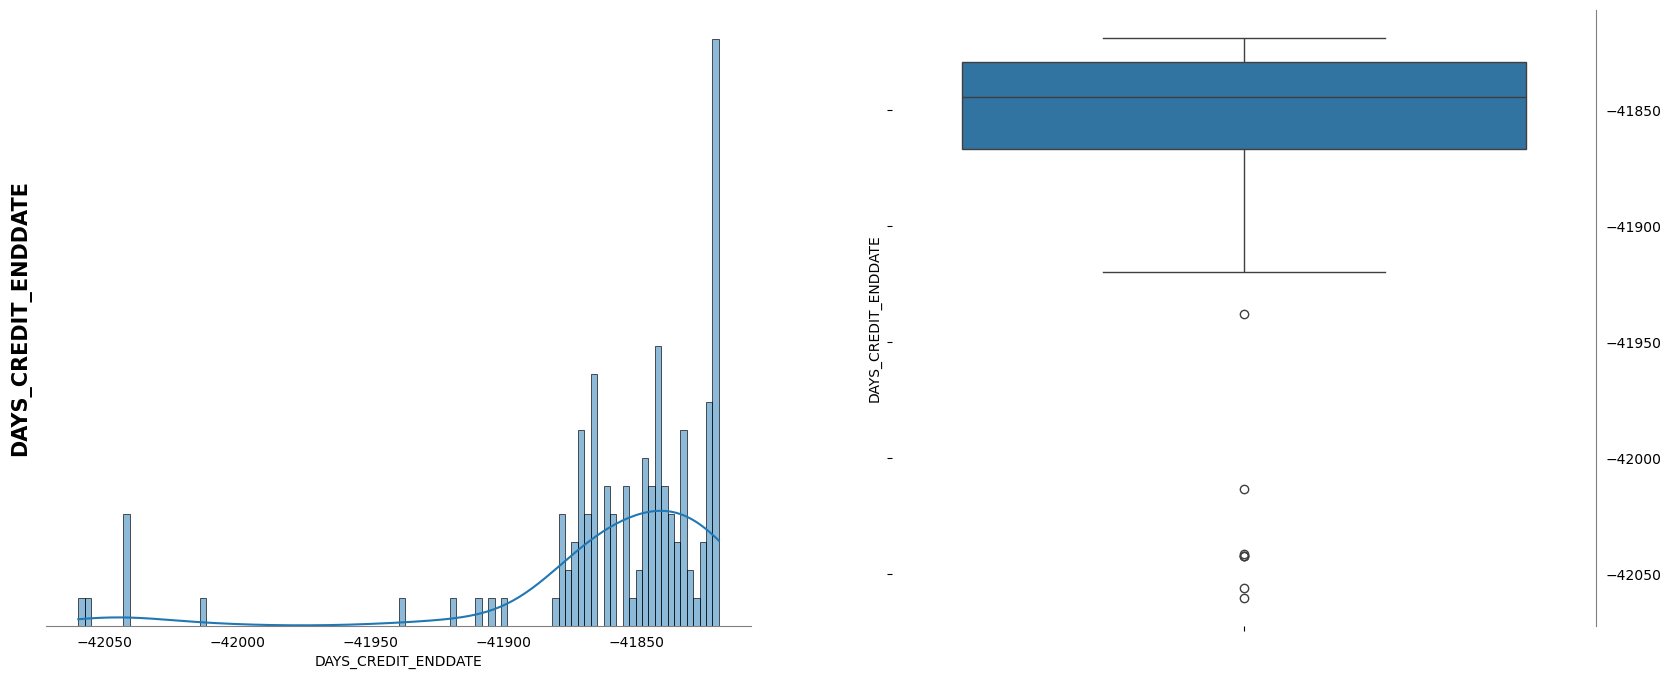

In [39]:
obj5 = Univariate_Analysis(df= df, col= 'DAYS_CREDIT_ENDDATE', num= True)
obj5.visualize()

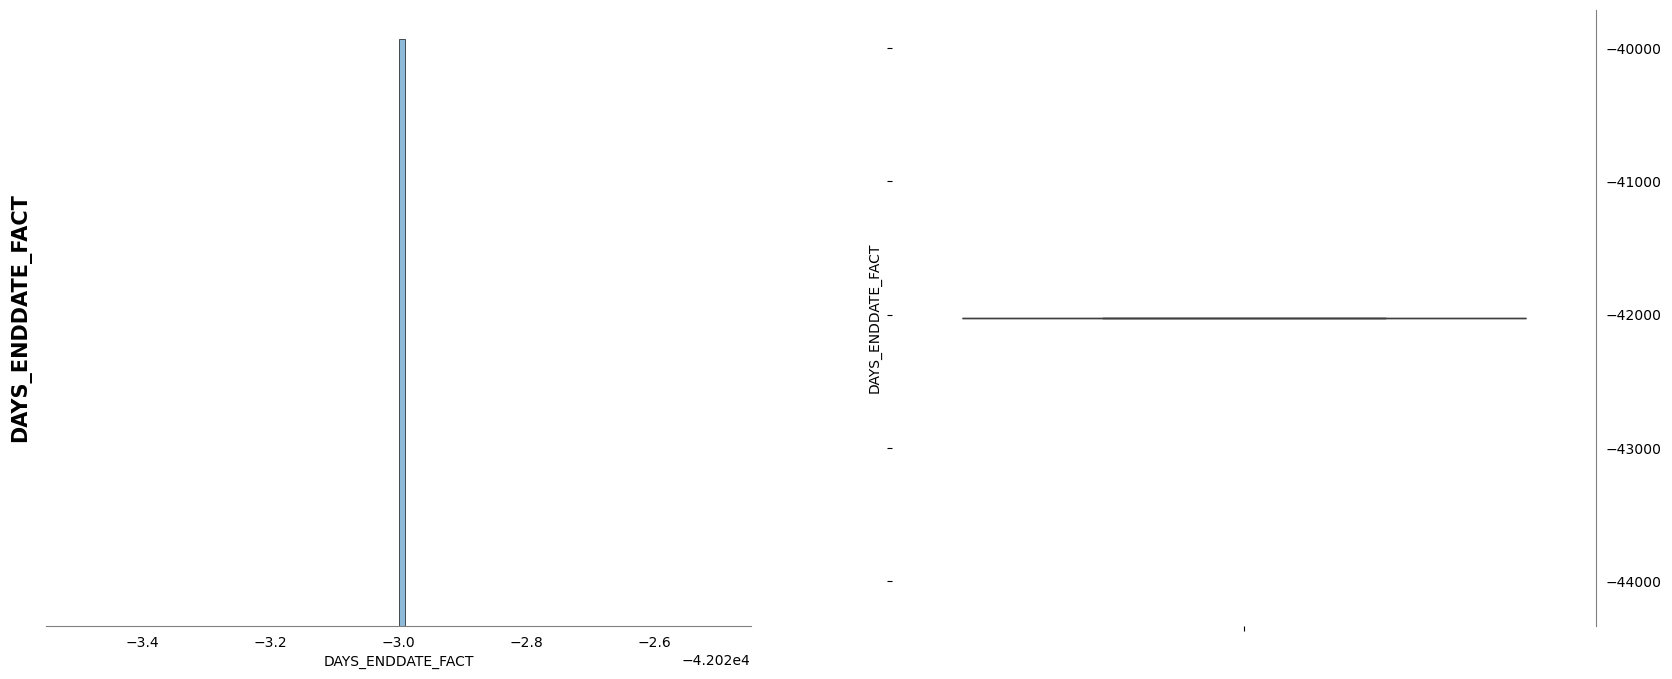

In [40]:
obj6 = Univariate_Analysis(df= df, col= 'DAYS_ENDDATE_FACT', num= True)
obj6.visualize()

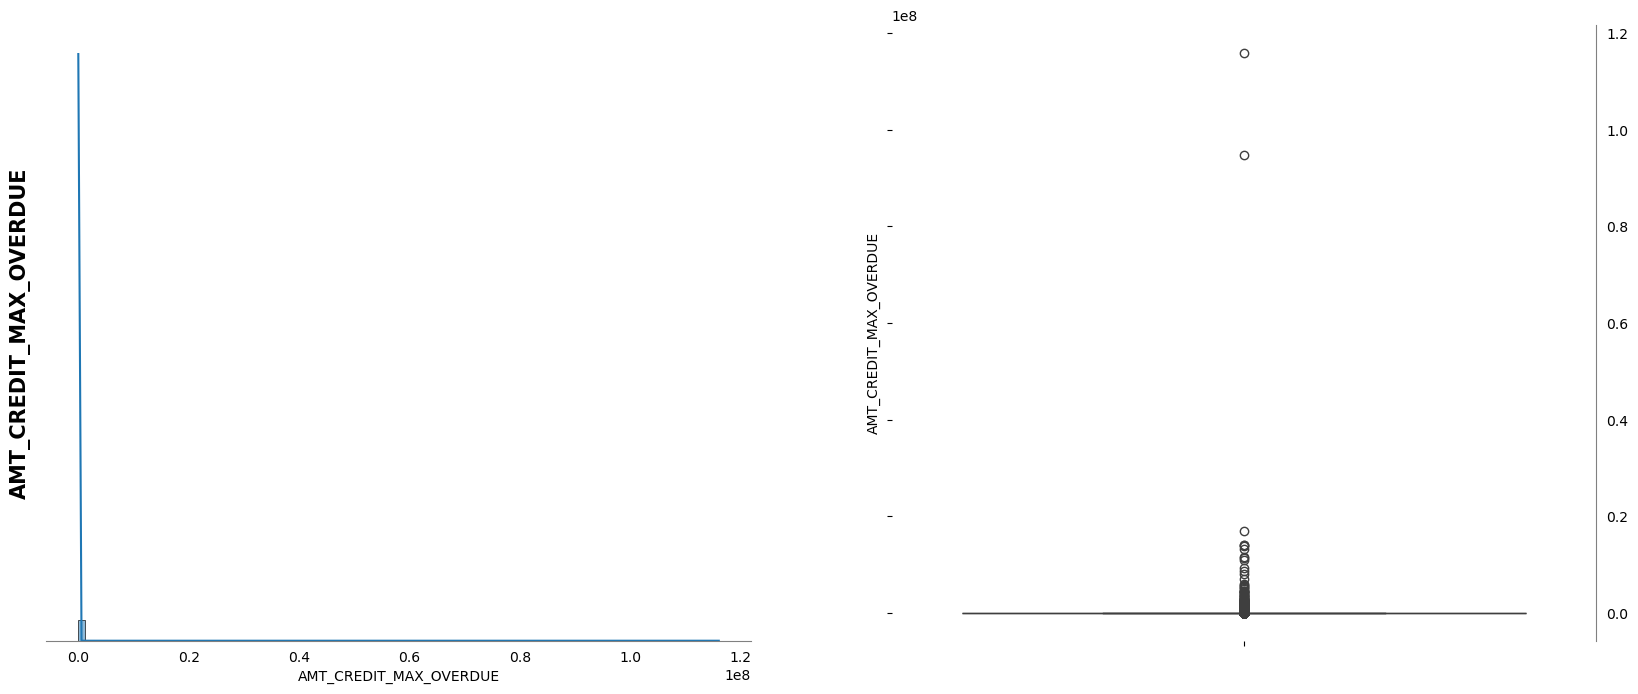

In [41]:
obj7 = Univariate_Analysis(df= df, col= 'AMT_CREDIT_MAX_OVERDUE', num= True)
obj7.visualize()

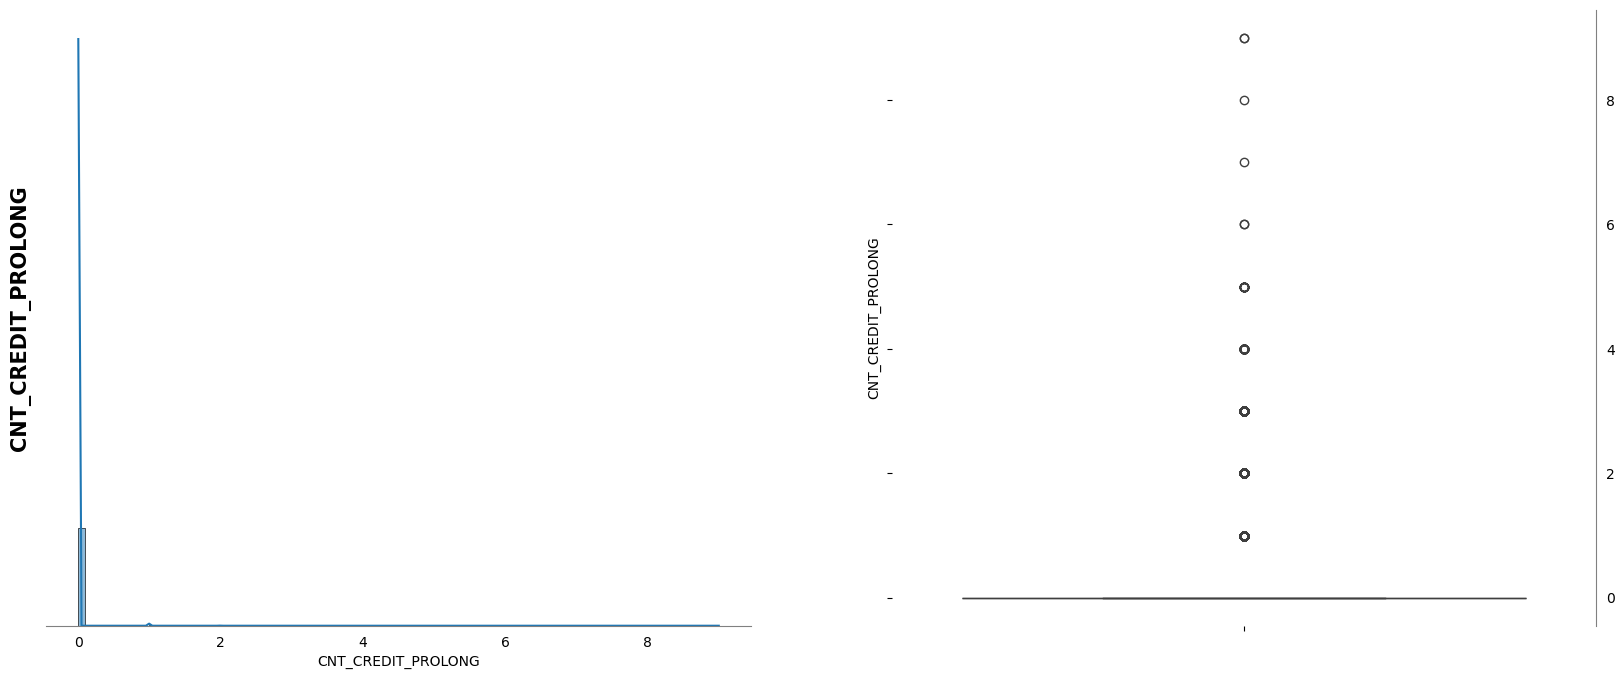

In [42]:
obj8 = Univariate_Analysis(df= df, col= 'CNT_CREDIT_PROLONG', num= True)
obj8.visualize()

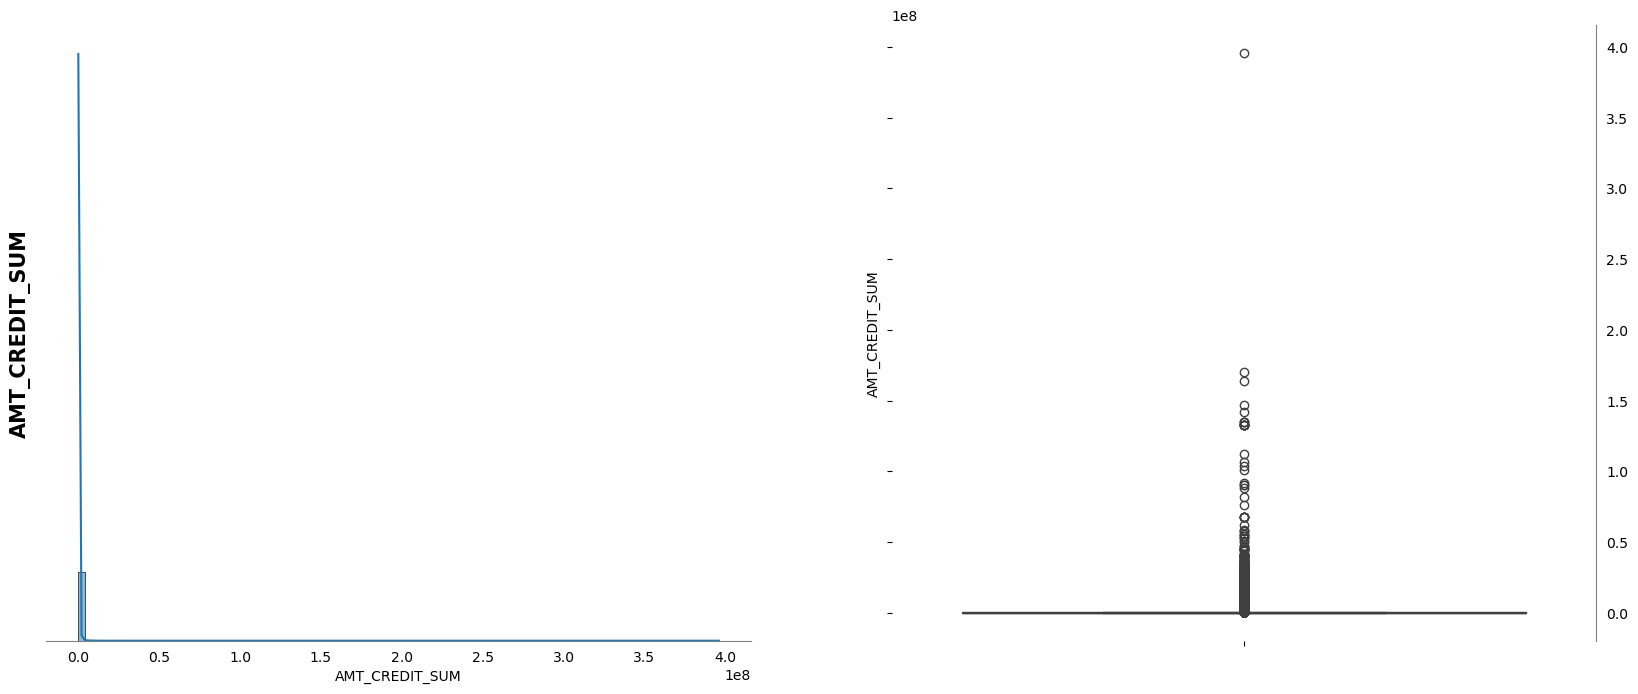

In [43]:
obj9 = Univariate_Analysis(df= df, col= 'AMT_CREDIT_SUM', num= True)
obj9.visualize()

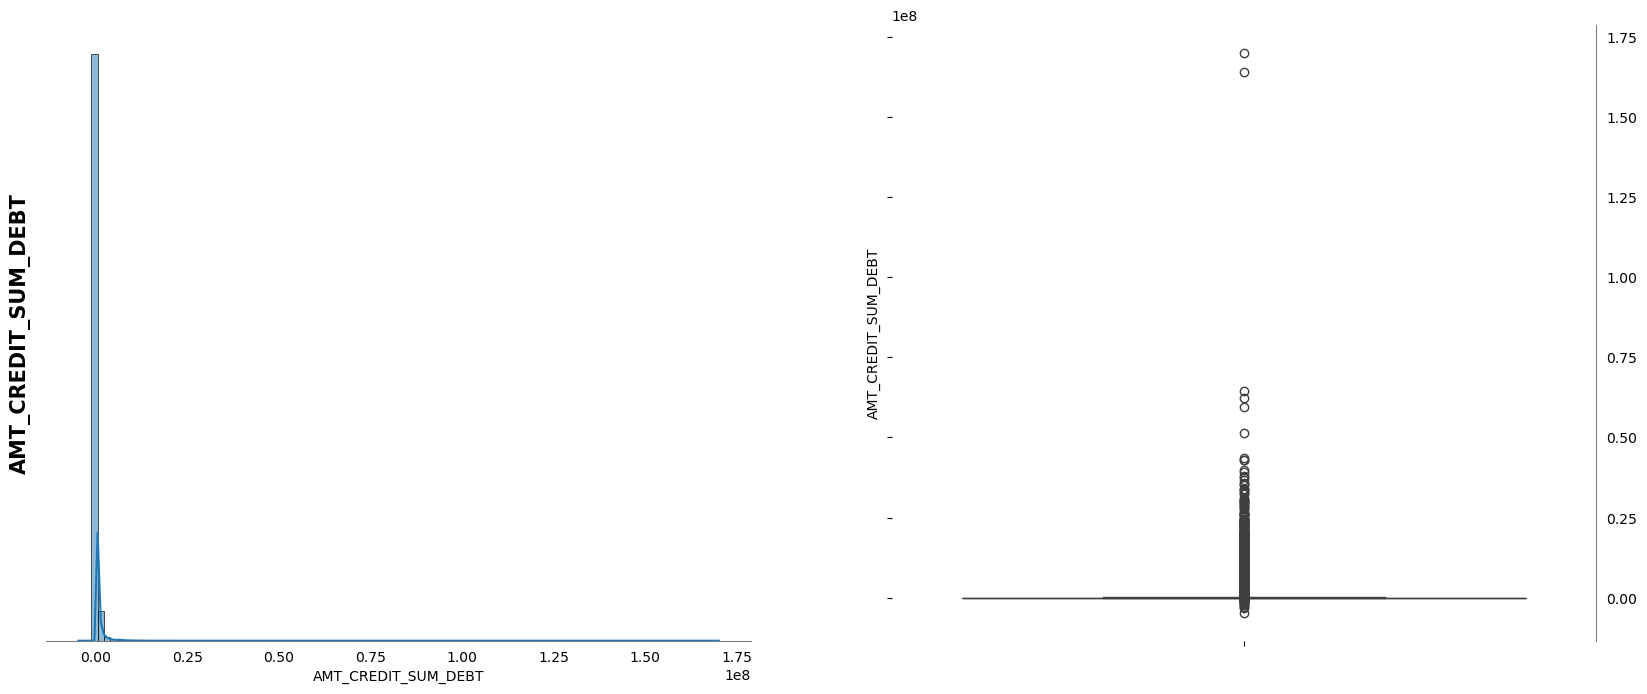

In [44]:
obj10 = Univariate_Analysis(df= df, col= 'AMT_CREDIT_SUM_DEBT', num= True)
obj10.visualize()

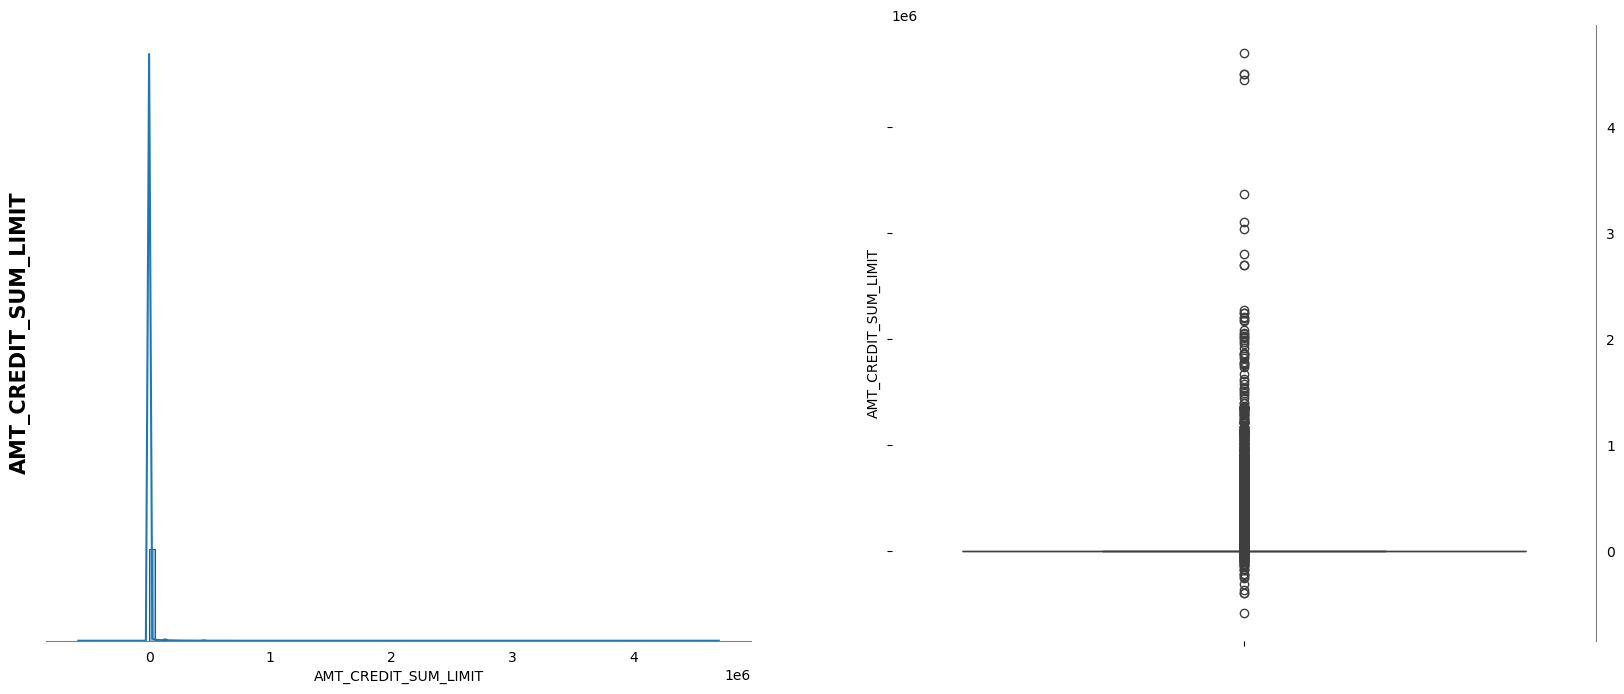

In [45]:
obj11 = Univariate_Analysis(df= df, col= 'AMT_CREDIT_SUM_LIMIT', num= True)
obj11.visualize()

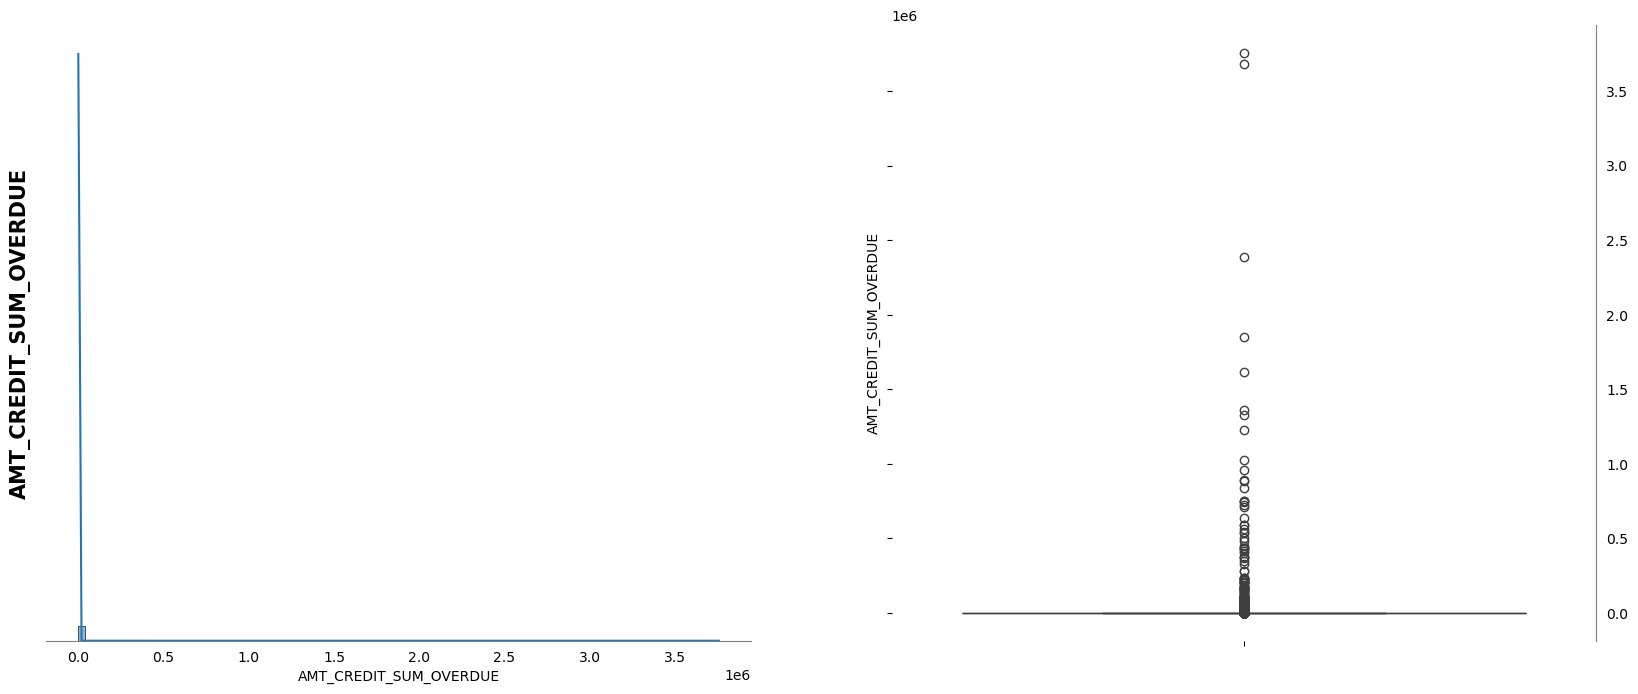

In [46]:
obj12 = Univariate_Analysis(df= df, col= 'AMT_CREDIT_SUM_OVERDUE', num= True)
obj12.visualize()

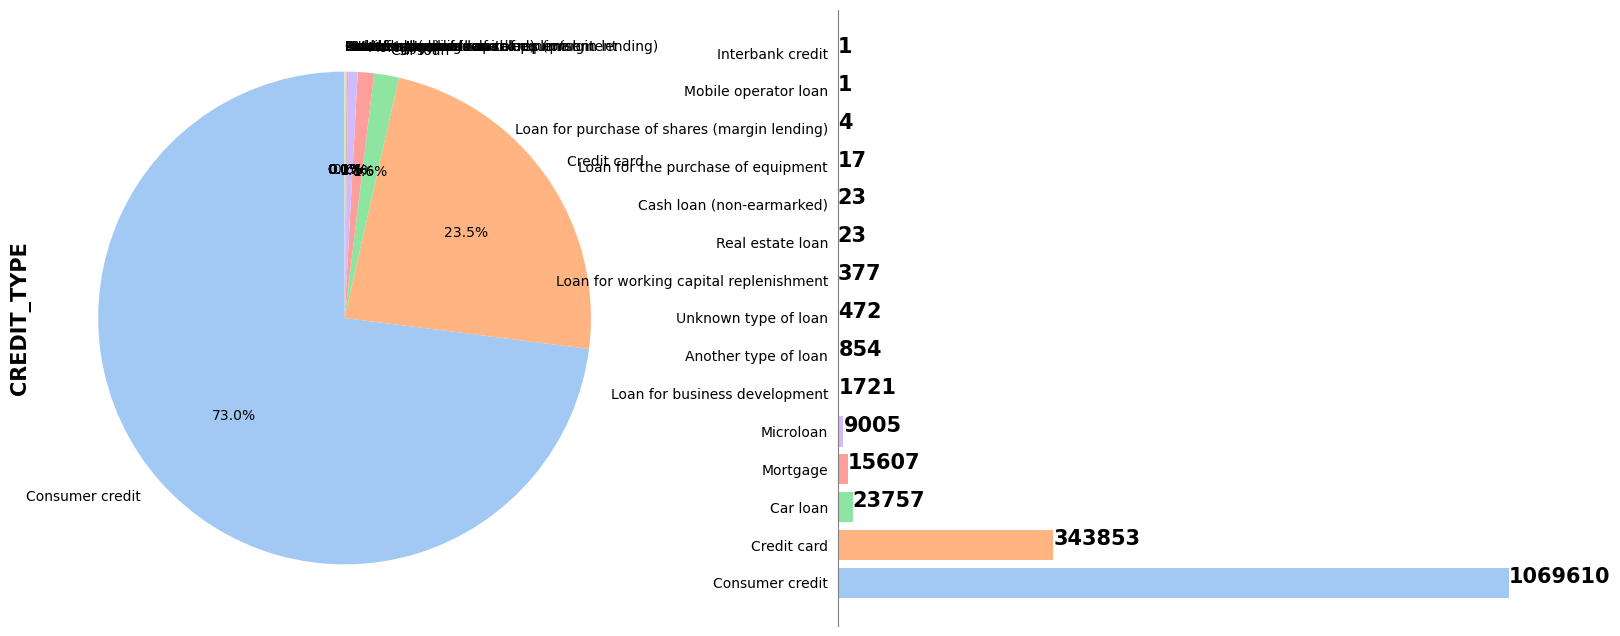

In [47]:
obj13 = Univariate_Analysis(df= df, col= 'CREDIT_TYPE', num= False)
obj13.visualize()

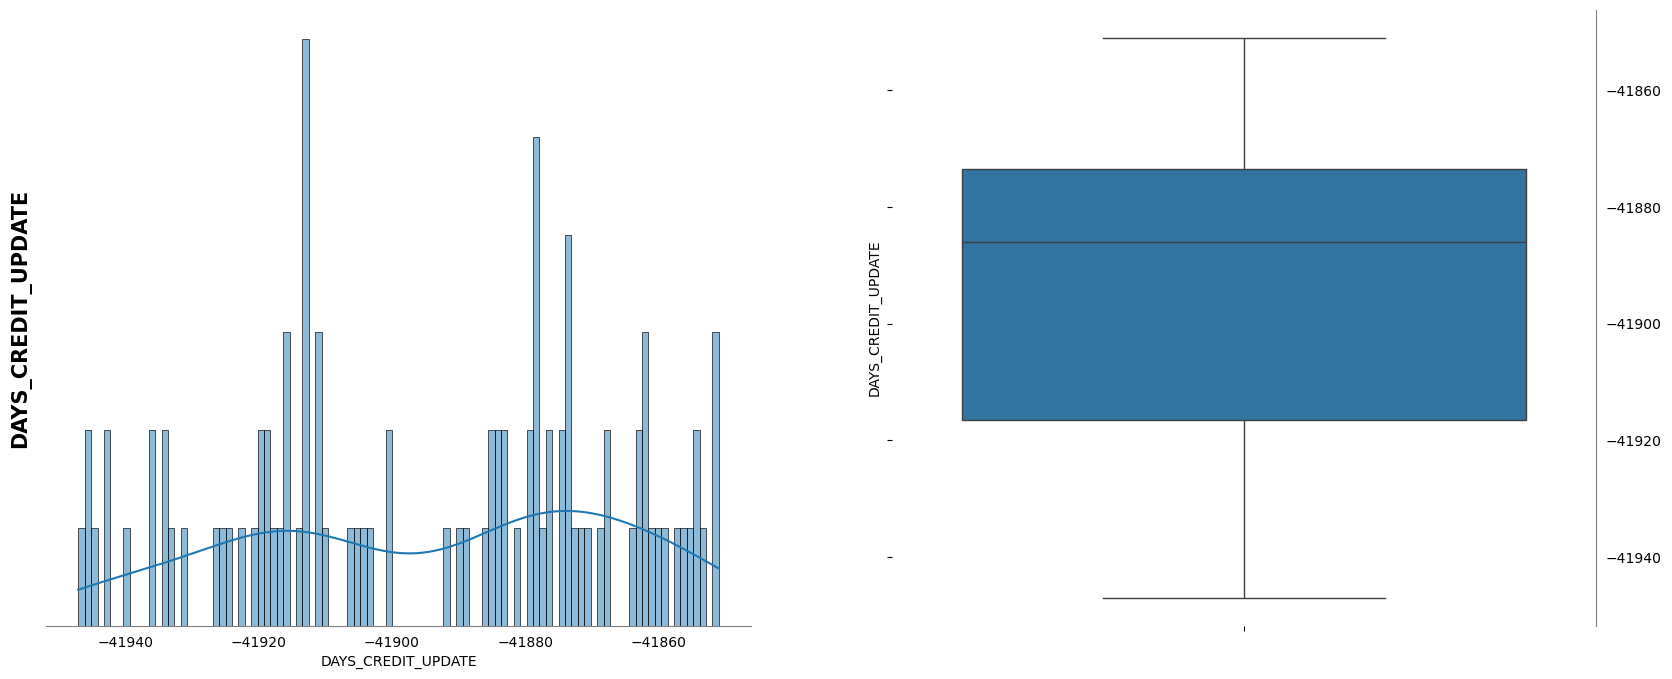

In [48]:
obj14 = Univariate_Analysis(df= df, col= 'DAYS_CREDIT_UPDATE', num= True)
obj14.visualize()

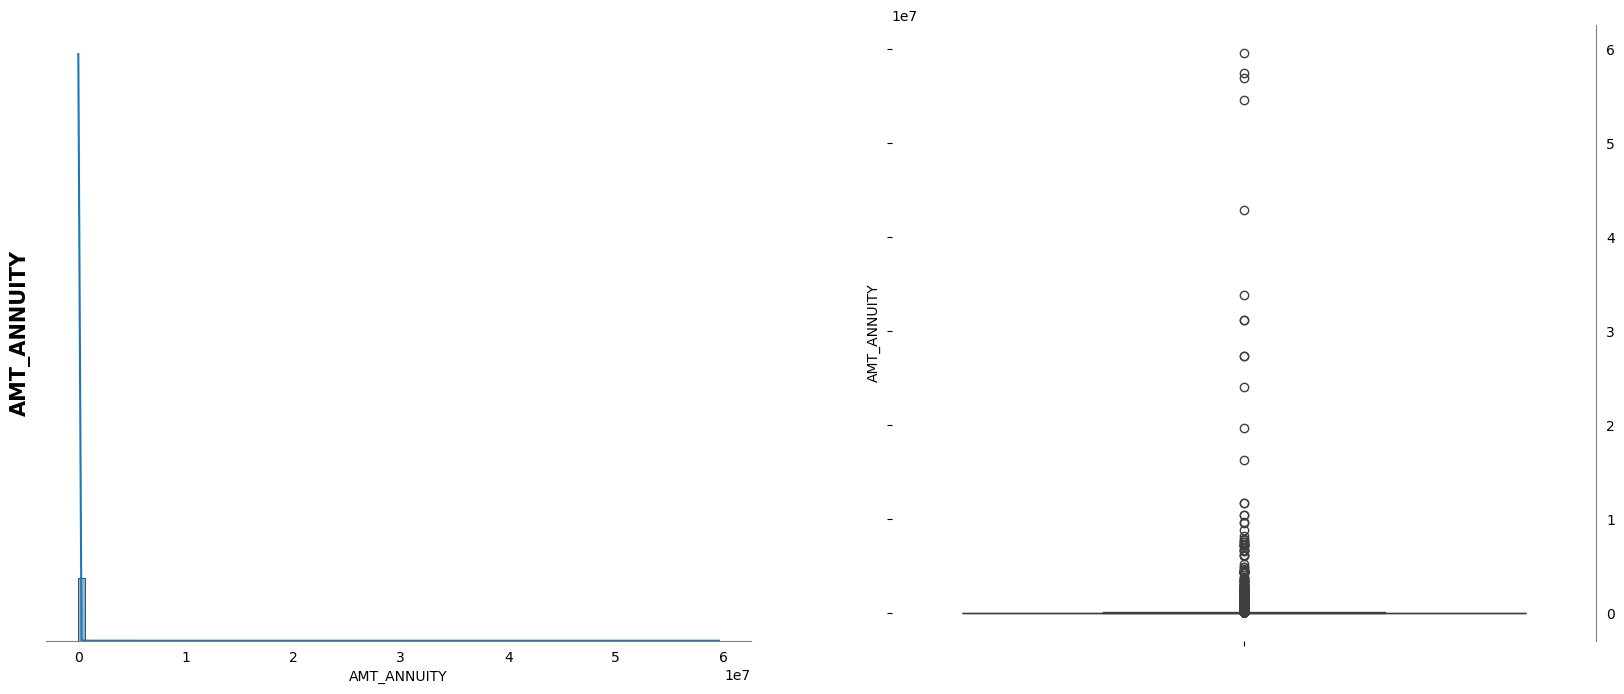

In [49]:
obj15 = Univariate_Analysis(df= df, col= 'AMT_ANNUITY', num= True)
obj15.visualize()

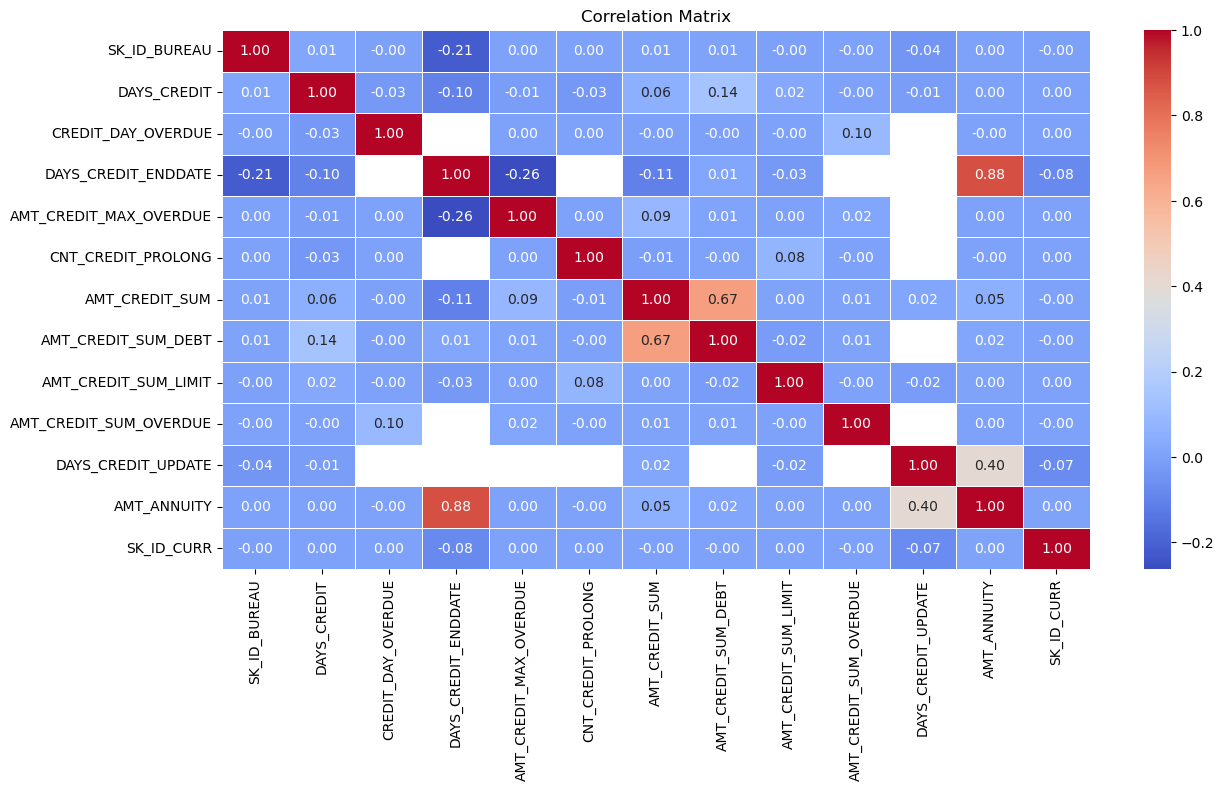

In [50]:
num = df_check.numdf
# Correlation
draw_corr(num)

### Features that have high correlation: 
* DAYS_CREDIT_ENDDATE - AMT_ANNUITY
* AMT_CREDIT_SUM - AMT_CREDIT_SUM_DEBT

# MERGE WITH TARGET TABLE

## EDA External

In [52]:
df2 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
df2 = df2[['SK_ID_CURR','TARGET']]
df2.head()

,SK_ID_CURR,TARGET
0,278621,0
1,139008,0
2,138348,0
3,64140,0
4,219374,0


In [53]:
merge_table = pd.merge(df, df2, on='SK_ID_CURR', how='left')
merge_table.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR,TARGET
0,5714462,Closed,currency 1,-497,0,NaN,NaN,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,NaN,254629,0.0
1,5714463,Active,currency 1,-208,0,NaN,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,NaN,254629,0.0
2,5714464,Active,currency 1,-203,0,NaN,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,NaN,254629,0.0
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,NaN,254629,0.0
4,5714466,Active,currency 1,-629,0,NaN,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,NaN,254629,0.0


### Number of past loans per customer

In [54]:
num_past_loan_target = merge_table[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target.head()

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0.0,1
1,1,1.0,1
2,2,0.0,6
3,3,0.0,7
4,4,0.0,6


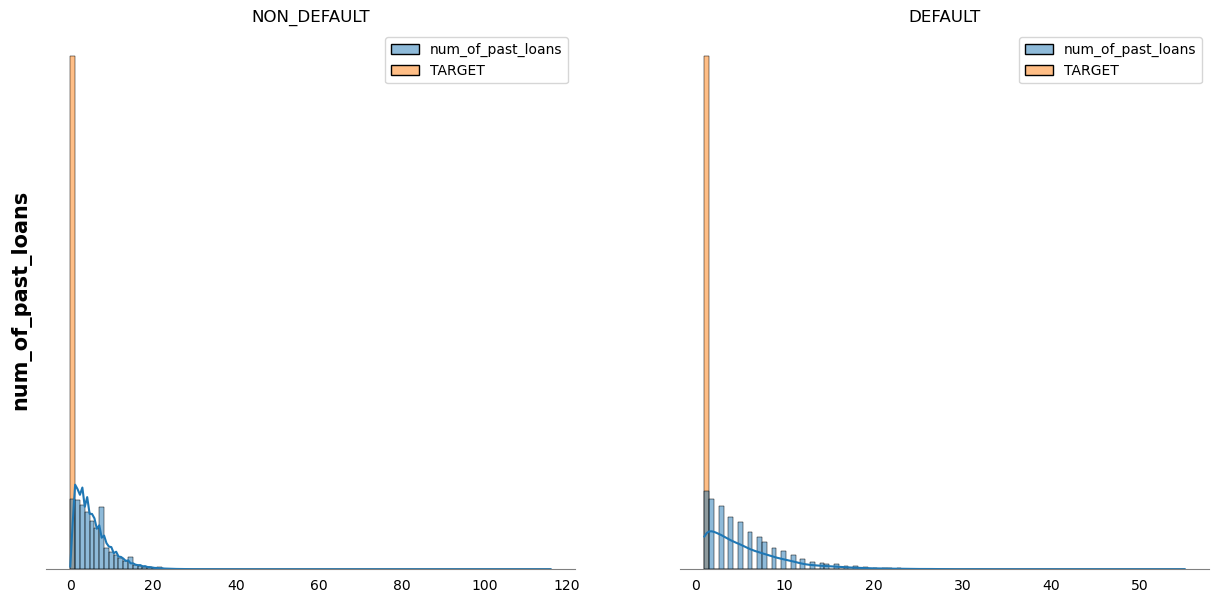

In [56]:
obj1 = Bivariate_Analysis(df = num_past_loan_target, col1= 'num_of_past_loans', num= True)
obj1.plothistogram()

### Number of types of past loans per customer

In [58]:
num_of_type_target = merge_table[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target.head()

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0.0,1
1,1,1.0,1
2,2,0.0,1
3,3,0.0,2
4,4,0.0,2


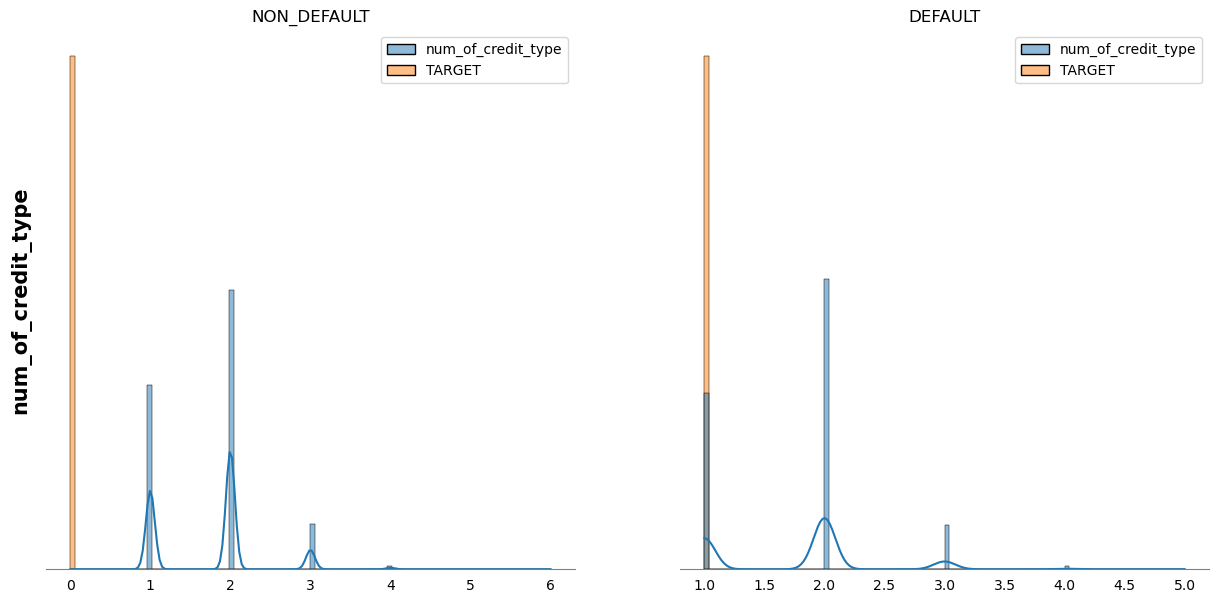

In [59]:
obj2 = Bivariate_Analysis(df = num_of_type_target, col1= 'num_of_credit_type', num= True)
obj2.plothistogram()

### The percentage of active loans per customer

In [60]:
merge_table['CREDIT_ACTIVE_BINARY'] = merge_table['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

merge_table['CREDIT_ACTIVE_BINARY'] = merge_table.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)


atv_loans_target = merge_table.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target.head()

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0.0,100.000000
1,1,1.0,100.000000
2,2,0.0,33.333333
3,3,0.0,42.857143
4,4,0.0,50.000000


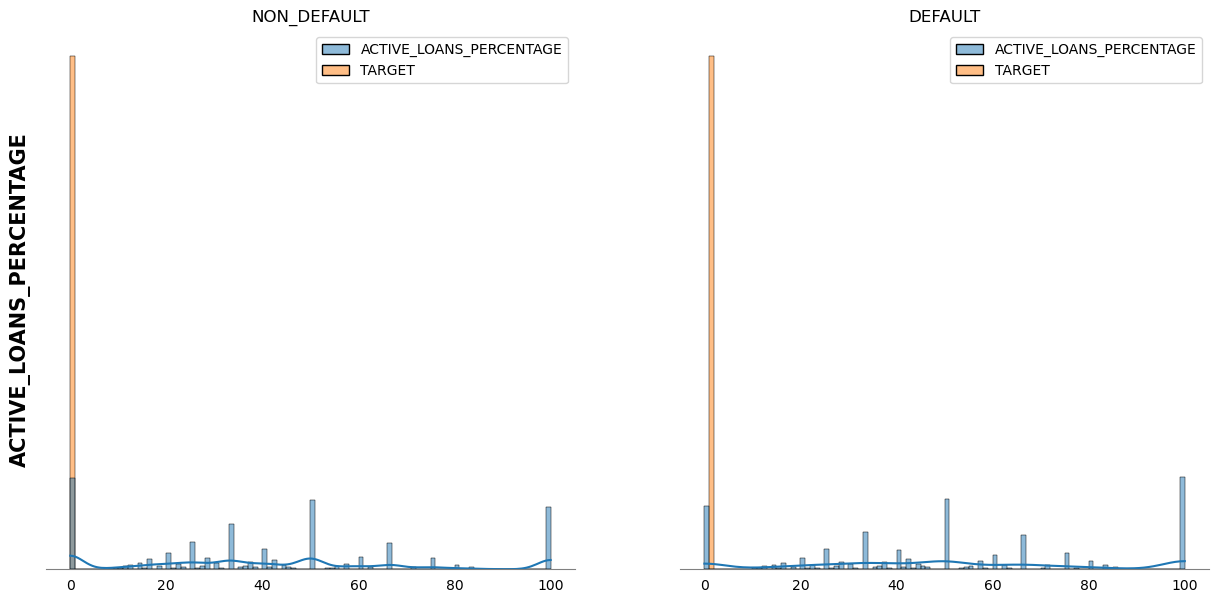

In [61]:
obj3 = Bivariate_Analysis(df = atv_loans_target, col1= 'ACTIVE_LOANS_PERCENTAGE', num= True)
obj3.plothistogram()

### The Ratio of Total Debt to Total Credit for each Customer

In [62]:
data_with_sum_debt_pos_sign = merge_table[merge_table['AMT_CREDIT_SUM_DEBT']>0]

grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = merge_table[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

merge_table = merge_table.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
merge_table = merge_table.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


merge_table['DEBT_CREDIT_RATIO'] = (merge_table['TOTAL_CUSTOMER_DEBT']/merge_table['TOTAL_CUSTOMER_CREDIT'])*100
merge_table['DEBT_CREDIT_RATIO'] = merge_table['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del merge_table['TOTAL_CUSTOMER_DEBT'], merge_table['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = merge_table.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target.head()

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0.0,90.706731
1,1,1.0,NaN
2,2,0.0,37.908544
3,3,0.0,41.072109
4,4,0.0,44.445915


In [63]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]
debt_credit_target.head()

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0.0,90.706731
2,2,0.0,37.908544
3,3,0.0,41.072109
4,4,0.0,44.445915
5,6,0.0,25.868718


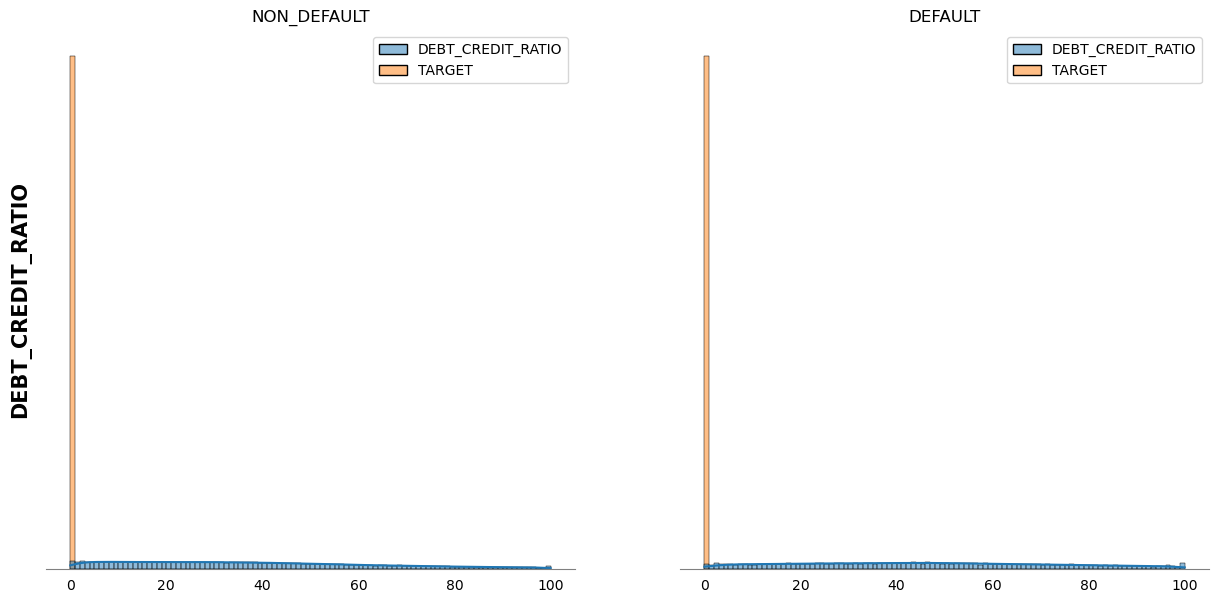

In [64]:
obj4 = Bivariate_Analysis(df = debt_credit_target, col1= 'DEBT_CREDIT_RATIO', num= True)
obj4.plothistogram()